In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
file = r'./data/count and model.csv'
df = pd.read_csv(file)

In this file, the preliminary analysis on the dataset was implemented. 
# Mothod 1

In [51]:
#
#想控制的变量就写在condition里面
#不想控制的就不写在condition里面
condition = (df['sex']=='F') & (df['current_data_year']==2005) & (df['month_of_death']==1) & (df['age']==1) & (df['ICD']==2)
df[condition]

,sex,current_data_year,month_of_death,age,education,activity,race,ICD,occurence,model
5,F,2005,1,1,0.0,10.0,1,2,11,0.870571
17,F,2005,1,1,0.0,10.0,2,2,1,0.116291
33,F,2005,1,1,0.0,10.0,4,2,1,0.025281
46,F,2005,1,1,1.0,10.0,1,2,4,18.218882
60,F,2005,1,1,1.0,10.0,2,2,2,2.433684
72,F,2005,1,1,1.0,10.0,4,2,1,0.529066
80,F,2005,1,1,3.0,10.0,1,2,1,0.302023


In [52]:
#例子
#控制变量'sex','age'
#不控制变量'month_of_death'
#观察第一种病：年份和死亡人数的趋势
condition = (df['sex']=='F') & (df['age']==1)  & (df['ICD']==1)
table = df[condition]
table_stat = table.groupby(['current_data_year'], sort=True).occurence.sum().reset_index()
table_model = table.groupby(['current_data_year'], sort=True).model.sum().reset_index()

In [53]:
table = pd.merge(table_stat,table_model)
table

,current_data_year,occurence,model
0,2005,301,334.461395
1,2006,304,345.745726
2,2007,298,345.519839
3,2008,312,350.493932
4,2009,390,360.413757
5,2010,375,353.990974
6,2011,326,353.331368
7,2012,338,358.396242
8,2013,293,366.784404
9,2014,338,366.425701


### Statistics

<BarContainer object of 10 artists>

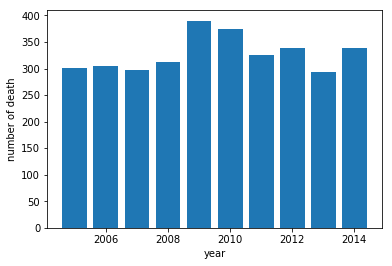

In [54]:
#你想观察什么哪个因素与死亡人数的关系，就把x设置为什么
x = table['current_data_year']
y = table['occurence']
plt.xlabel("year")
plt.ylabel("number of death")
plt.bar(x,y)

### Model

<BarContainer object of 10 artists>

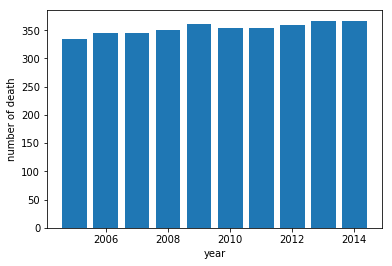

In [55]:
x = table['current_data_year']
y = table['model']
plt.xlabel("year")
plt.ylabel("number of death")
plt.bar(x,y)

# Another Example

In [56]:
condition = (df['sex']=='F') & (df['ICD']==1) & (df['current_data_year']==2005)
table = df[condition]
table_stat = table.groupby(['age'], sort=True).occurence.sum().reset_index()
table_model = table.groupby(['age'], sort=True).model.sum().reset_index()

In [57]:
table = pd.merge(table_stat,table_model)
table

,age,occurence,model
0,1,301,334.461395
1,2,39,30.782648
2,3,44,35.975013
3,4,83,63.415015
4,5,132,138.458290
5,6,262,263.748470
6,7,504,426.853989
7,8,774,714.496118
8,9,1198,1212.574909
9,10,1510,1805.863017


<BarContainer object of 22 artists>

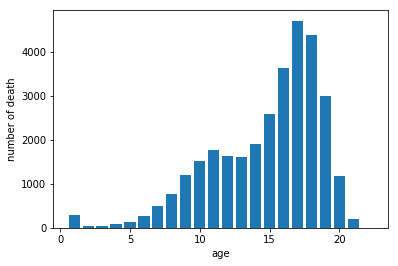

In [58]:
x = table['age']
y = table['occurence']
plt.xlabel("age")
plt.ylabel("number of death")
plt.bar(x,y)

<BarContainer object of 22 artists>

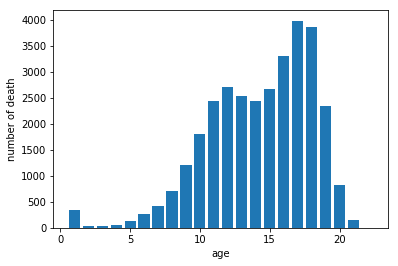

In [59]:
x = table['age']
y = table['model']
plt.xlabel("age")
plt.ylabel("number of death")
plt.bar(x,y)

# 第二种方法 

In [60]:
#不控制变量，只考虑ICD与死亡人数关系
df.groupby(['ICD'], sort=True).occurence.sum().reset_index()

,ICD,occurence
0,1,685702
1,2,5880098
2,3,99256
3,4,1031898
4,5,1177367
5,6,1391534
6,7,473
7,8,659
8,9,8071114
9,10,2431414


### Statistic

<BarContainer object of 20 artists>

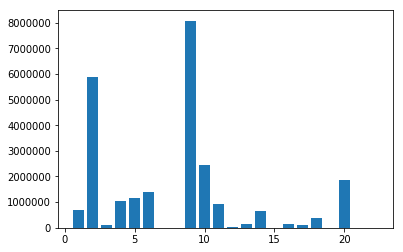

In [61]:
table_stat = df.groupby(['ICD'], sort=True).occurence.sum().reset_index()
x = table_stat['ICD']
y = table_stat['occurence']
plt.bar(x,y)

### Model 

<BarContainer object of 20 artists>

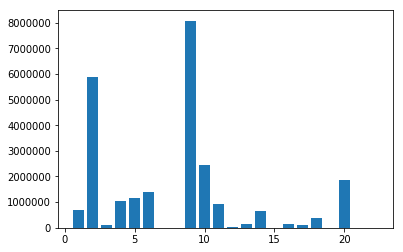

In [62]:
table_model = df.groupby(['ICD'], sort=True).model.sum().reset_index()
x = table_model['ICD']
y = table_model['model']
plt.bar(x,y)